In [57]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import math
import matplotlib.pyplot as plt

In [19]:
# import trade data into a pandas dataframe (i=exporter, j=importer)
trade_data_df = pd.read_excel(open("Gravity Model Data.xlsx"))

# create columns for the logs of real gdp and the distance columns
trade_data_df["log_value_ij"] = trade_data_df['value_ij'].apply(lambda x: math.log(x))
trade_data_df["log_distance_ij"] = trade_data_df['distance_ij'].apply(lambda x: math.log(x))
trade_data_df["log_rgdp_i"] = trade_data_df['rgdp_i'].apply(lambda x: math.log(x))
trade_data_df["log_rgdp_j"] = trade_data_df['rgdp_j'].apply(lambda x: math.log(x))

# trade_data_df

In [23]:
# summary statistics
print trade_data_df.describe()

           value_ij    contig_ij  language_ij    colony_ij   distance_ij  \
count  1.600000e+03  1600.000000  1600.000000  1600.000000   1600.000000   
mean   5.121617e+04     0.081250     0.083750     0.062500   5112.193231   
std    6.721498e+05     0.273304     0.277099     0.242137   4407.127802   
min    6.972765e-01     0.000000     0.000000     0.000000      8.449664   
25%    1.464511e+02     0.000000     0.000000     0.000000   1352.005629   
50%    8.140458e+02     0.000000     0.000000     0.000000   2845.896596   
75%    4.010075e+03     0.000000     0.000000     0.000000   8690.290752   
max    2.313102e+07     1.000000     1.000000     1.000000  18260.394981   

             rgdp_i        rgdp_j  log_value_ij  log_distance_ij   log_rgdp_i  \
count  1.600000e+03  1.600000e+03   1600.000000      1600.000000  1600.000000   
mean   1.269563e+06  1.269563e+06      6.666501         8.028525    12.855869   
std    2.323684e+06  2.323684e+06      2.494199         1.142590     1.7

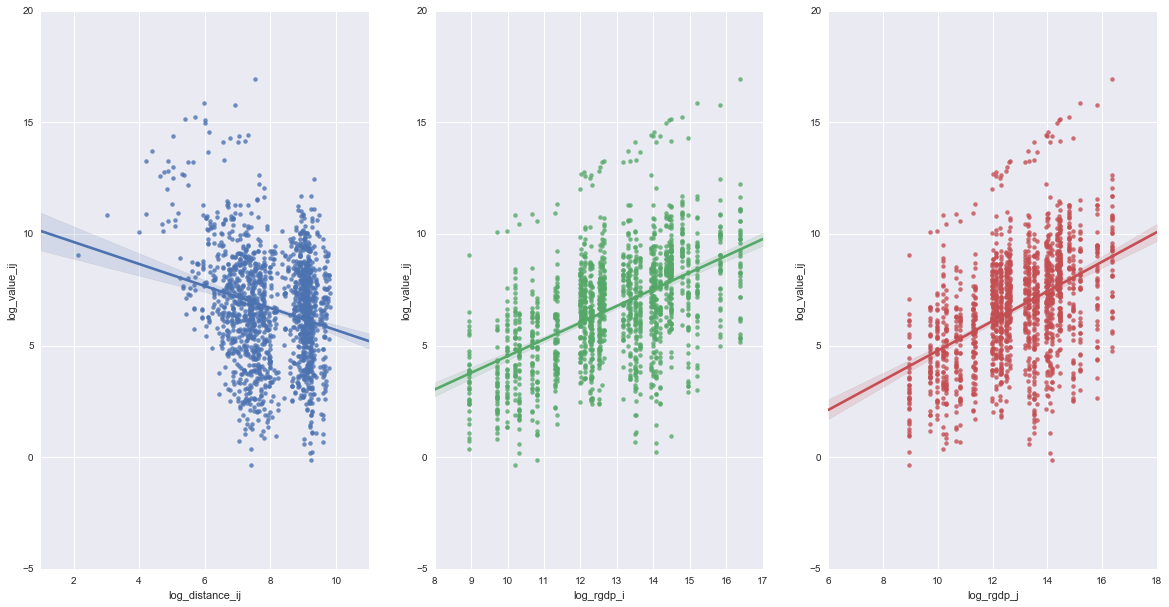

In [56]:
# scatter plots
%matplotlib inline

# set number of subplots and figure size
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# regression plots
sns.regplot(x="log_distance_ij", y="log_value_ij", data=trade_data_df, ax=axs[0])
sns.regplot(x="log_rgdp_i", y="log_value_ij", data=trade_data_df, ax=axs[1])
sns.regplot(x="log_rgdp_j", y="log_value_ij", data=trade_data_df, ax=axs[2])

In [59]:
# regress export value on each country's gdp and distance
reg_result = sm.ols(formula="log_value_ij ~ log_rgdp_i + log_rgdp_j + log_distance_ij", data=trade_data_df).fit()

In [61]:
print reg_result.params
print reg_result.summary()

Intercept         -7.444710
log_rgdp_i         1.017904
log_rgdp_j         0.932012
log_distance_ij   -1.364716
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           log_value_ij   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2108.
Date:                Fri, 13 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:57:48   Log-Likelihood:                -2450.7
No. Observations:                1600   AIC:                             4909.
Df Residuals:                    1596   BIC:                             4931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]

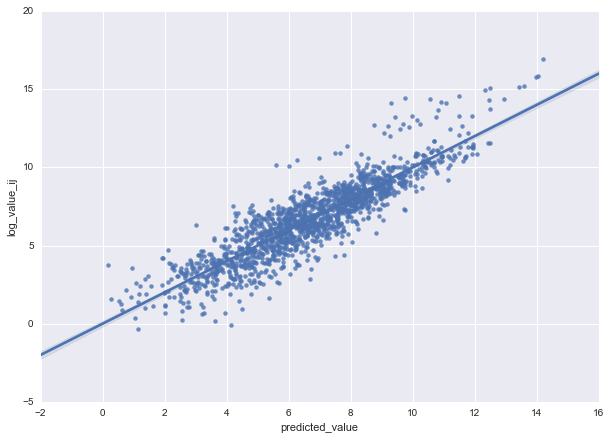

In [81]:

trade_data_df['predicted_value'] = reg_result.predict()

plt.figure(figsize=(10, 7))
sns.regplot(x="predicted_value", y="log_value_ij", data=trade_data_df)